## CLASSIFICATION WITH MIDTERM SCORES

## Data loading and set up

In [49]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns 
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split,KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.datasets import make_moons
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from  sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

In [50]:
#initiate path and load data
path_to_data = "/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project_-portugese-secondary-student-performance/data/student"
mat = pd.read_csv(path_to_data+'/student-mat.csv', sep=";")
por = pd.read_csv(path_to_data+'/student-por.csv', sep=";")

In [51]:
# merge datasets
df = pd.concat([mat,por])

In [52]:
# rename column labels
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'family_size', 'parents_status',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'reason', 'guardian', 'commute_time', 'study_time', 'failures',
       'school_support', 'family_support', 'paid_classes', 'activities',
       'nursery', 'desire_higher_edu', 'internet', 'romantic',
       'family_quality', 'free_time', 'go_out', 'weekday_alcohol_usage',
       'weekend_alcohol_usage', 'health', 'absences', 'period1_score',
       'period2_score', 'final_score'],
      dtype='object')


In [53]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'good' 
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'fair' 
df.loc[(df.final_score >= 0) & (df.final_score <= 9), 'final_grade'] = 'poor' 
df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fair


# Data Preprocessing

In [54]:
# Drop final score column
df_class = df.drop(['final_score'], axis = 1)
# Separate feature matrix and target variable
y_class = df_class['final_grade'] #predict final grades so make final grades 'G3' the target variable
X_class = df_class.loc[:, df_class.columns != 'final_grade'] 
#print("target variable:",y_class)
#print("feaature matrix:", X_class.head())

In [55]:
## Split data using KFold split
random_state = 42

# first split to separate out the test set
X_class_other, X_class_test, y_class_other, y_class_test = train_test_split(X_class,y_class,test_size = 0.2,random_state=random_state)
#print(X_class_other.shape,y_class_other.shape)
#print('Feature test set:',X_class_test.shape, X_class_test.head(3), y_class_test.shape, y_class_test.head(3))

# do KFold split on other
kf = KFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_class_other,y_class_other):
    X_class_train = X_class_other.iloc[train_index]
    y_class_train = y_class_other.iloc[train_index]
    X_class_val = X_class_other.iloc[val_index]
    y_class_val = y_class_other.iloc[val_index]
    #print(' Feature training set:',X_class_train.shape,  X_class_train.head(3), y_class_train.shape, y_class_train.head(3))
    #print(' Feature validation set:',X_class_val.shape, X_class_val.head(3),y_class_val.shape, y_class_val.head(3)) 
    

In [56]:
# collect which encoder to use on each feature
# needs to be done manually
onehot_ftrs = ['school','sex','age','address','family_size','parents_status', 
               'mother_job','father_job','reason','guardian','school_support',
               'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic']
minmax_ftrs = ['age','absences']
std_ftrs = ['period1_score','period2_score']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_class_train_prep = clf.fit_transform(X_class_train)
X_class_val_prep = clf.transform(X_class_val)
X_class_test_prep = clf.transform(X_class_test)

print(X_class_train.shape)
print(X_class_train_prep.shape)

#apply label encoder to target variable 
le = LabelEncoder()
y_class_train_prep = le.fit_transform(y_class_train)
print('Target variable for classifcation training prep set:', y_class_train.shape, y_class_train.head(3)) 
y_class_val_prep = le.transform(y_class_val)
print('Target variable for classifcation validation prep set:', y_class_val.shape, y_class_val.head(3)) 
y_class_test_prep = le.transform(y_class_test)
print('Target variable for classifcation validation prep set:', y_class_test.shape, y_class_test.head(3)) 

(668, 32)
(668, 55)
Target variable for classifcation training prep set: (668,) 136    fair
350    poor
60     fair
Name: final_grade, dtype: object
Target variable for classifcation validation prep set: (167,) 256    fair
535    fair
397    fair
Name: final_grade, dtype: object
Target variable for classifcation validation prep set: (209,) 576    fair
280    poor
141    fair
Name: final_grade, dtype: object


# Hyperparameter Tuning

## Baseline accuracy

In [69]:
df_class['final_grade'].describe()

count     1044
unique       3
top       fair
freq       610
Name: final_grade, dtype: object

In [67]:
610/len(df_class['final_grade'])

0.5842911877394636

## Function

In [57]:
mean_test_scores = []
std_test_scores = []
def MLpipe_KFold_Acc(X,y,preprocessor,ML_algo,param_grid):
    '''
    This function splits the data to other/test (80/20) and then applies KFold with 4 folds to other.
    The RMSE is minimized in cross-validation.
    '''
    test_scores = np.zeros(10)
    best_models = []
    
    
    # loop through 10 random states (2 points)
    for i in range(1,10):
    
        # split data to other/test 80/20, and the use KFold with 4 folds (2 points)
        # first split to separate out the test set
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)
        #print(X_other.shape,y_other.shape)
        #print('test set:',X_test.shape,y_test.shape)
        
        #label encoder
        le = LabelEncoder()
        y_other_prep = le.fit_transform(y_other)
        y_test_prep = le.transform(y_test)

        # do KFold split on other
        kf = KFold(n_splits=4,shuffle=True,random_state=42*i)

        # preprocess the data (1 point)
        pipe = make_pipeline(preprocessor,ML_algo)
        
        # loop through the hyperparameter combinations or use GridSearchCV (2 points)
        ##create grid search CV with the pipeline, parameter grid, and scoring metric
        grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score, greater_is_better=True),
                        cv=kf, return_train_score = True, n_jobs = -1)

        # for each combination, calculate the train and validation scores using the evaluation metric
        grid.fit(X_other, y_other_prep)
        
        #save results to a datafrmae
        #results = pd.DataFrame(grid.cv_results_)
        #print(results[['params', 'mean_test_score', 'mean_train_score']])

        # find which hyperparameter combination gives the best validation score (1 point)
        print("best model parameters:", grid.best_params_)
        print('validation score:',grid.best_score_)

        # calculate the best model
        best_models.append(grid)
        
        # calculate and save the test score
        y_test_pred = best_models[-1].predict(X_test)
        test_scores[i] = accuracy_score(y_test_prep,y_test_pred)
        print('test score:', test_scores[i])
        
    return best_models, test_scores

## Apply on models

In [70]:
#1. RF Classifier
#ML ago
ML_algo = RandomForestClassifier()
#encoders and preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)])
#parameters
param_grid = {
              'randomforestclassifier__max_depth': [1, 3, 10, 30], # the max_depth should be smaller or equal than the number of features roughly
              'randomforestclassifier__max_features': [0.5,0.75,1.0] # linearly spaced between 0.5 and 1
              } 
#calculation
models, scores = MLpipe_KFold_Acc(X_class,y_class,preprocessor,ML_algo,param_grid)
print(scores)


#calculate mean and standard deviation of test scores
mean_test_score = np.mean(scores)
std_test_score = np.std(scores)

#append to the list
mean_test_scores.append(mean_test_score)
std_test_scores.append(std_test_score)

print("mean test score:", mean_test_scores)
print("standard deviation test score:", std_test_scores)

best model parameters: {'randomforestclassifier__max_depth': 1, 'randomforestclassifier__max_features': 0.5}
validation score: 0.6036299227088701
test score: 0.507177033492823
best model parameters: {'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 0.75}
validation score: 0.5928758741258741
test score: 0.5885167464114832
best model parameters: {'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 1.0}
validation score: 0.5963608759661392
test score: 0.5454545454545454
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}
validation score: 0.5856585848362164
test score: 0.569377990430622
best model parameters: {'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 0.75}
validation score: 0.5927608575634893
test score: 0.5598086124401914
best model parameters: {'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 0.5}
valid

**Comments**
Best model is random forest regressor 
best model parameters: {'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 0.5}
validation score: 0.5712297570850202
test score: 0.6220095693779905

In [71]:
#2. SVC
from sklearn.svm import SVC

#ML ago
ML_algo = SVC()
#encoders and preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)])
#parameters
param_grid = {'svc__C': np.logspace(-2,4,num=10),'svc__gamma': np.logspace(-2,4,num=10)}
#calculation
models, scores = MLpipe_KFold_Acc(X_class,y_class,preprocessor,ML_algo,param_grid)
print(scores)


#calculate mean and standard deviation of test scores
mean_test_score = np.mean(scores)
std_test_score = np.std(scores)

#append to the list
mean_test_scores.append(mean_test_score)
std_test_scores.append(std_test_score)

print("mean test score:", mean_test_scores)
print("standard deviation test score:", std_test_scores)

best model parameters: {'svc__C': 4.6415888336127775, 'svc__gamma': 2154.4346900318824}
validation score: 0.6155858943687891
test score: 0.5263157894736842
best model parameters: {'svc__C': 1.0, 'svc__gamma': 464.1588833612773}
validation score: 0.5952624677953626
test score: 0.5789473684210527
best model parameters: {'svc__C': 4.6415888336127775, 'svc__gamma': 2154.4346900318824}
validation score: 0.6023532388663968
test score: 0.5645933014354066
best model parameters: {'svc__C': 1.0, 'svc__gamma': 464.1588833612773}
validation score: 0.5940605447184395
test score: 0.5933014354066986
best model parameters: {'svc__C': 1.0, 'svc__gamma': 464.1588833612773}
validation score: 0.6023474880382775
test score: 0.569377990430622
best model parameters: {'svc__C': 1.0, 'svc__gamma': 464.1588833612773}
validation score: 0.5880681818181818
test score: 0.5980861244019139
best model parameters: {'svc__C': 4.6415888336127775, 'svc__gamma': 2154.4346900318824}
validation score: 0.5880049227088702
test

**Comments**
Best model is SVC
best model parameters: {'svc__C': 4.6415888336127775, 'svc__gamma': 2154.4346900318824}
validation score: 0.5880049227088702
test score: 0.6411483253588517

In [72]:
#3. KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
#ML ago
ML_algo = KNeighborsClassifier()
#encoders and preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)])
#parameters
param_grid = {'kneighborsclassifier__n_neighbors': np.arange(1,50,4), 'kneighborsclassifier__weights': ['uniform', 'distance']}
#calculation
models, scores = MLpipe_KFold_Acc(X_class,y_class,preprocessor,ML_algo,param_grid)
print(scores)


#calculate mean and standard deviation of test scores
mean_test_score = np.mean(scores)
std_test_score = np.std(scores)

#append to the list
mean_test_scores.append(mean_test_score)
std_test_scores.append(std_test_score)

print("mean test score:", mean_test_scores)
print("standard deviation test score:", std_test_scores)

best model parameters: {'kneighborsclassifier__n_neighbors': 33, 'kneighborsclassifier__weights': 'uniform'}
validation score: 0.6060165163783584
test score: 0.507177033492823
best model parameters: {'kneighborsclassifier__n_neighbors': 37, 'kneighborsclassifier__weights': 'uniform'}
validation score: 0.5904777788001472
test score: 0.569377990430622
best model parameters: {'kneighborsclassifier__n_neighbors': 45, 'kneighborsclassifier__weights': 'distance'}
validation score: 0.5963378726536621
test score: 0.5311004784688995
best model parameters: {'kneighborsclassifier__n_neighbors': 41, 'kneighborsclassifier__weights': 'uniform'}
validation score: 0.5844624125874125
test score: 0.5933014354066986
best model parameters: {'kneighborsclassifier__n_neighbors': 29, 'kneighborsclassifier__weights': 'uniform'}
validation score: 0.5903512605815238
test score: 0.5502392344497608
best model parameters: {'kneighborsclassifier__n_neighbors': 45, 'kneighborsclassifier__weights': 'uniform'}
validat

**Comments**
Best model for KNN
best model parameters: {'kneighborsclassifier__n_neighbors': 45, 'kneighborsclassifier__weights': 'uniform'}
validation score: 0.5724546834744203
test score: 0.6267942583732058

In [61]:
ML_models = ['RF Classifier', 'SVC', 'KNN-Classification']

Text(0, 0.5, " mean and standard deviation of each algo's best models")

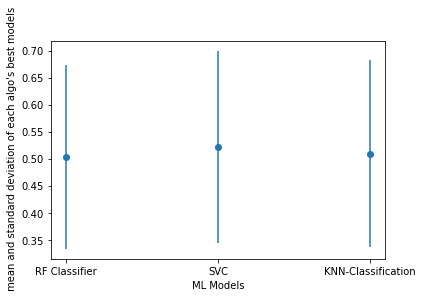

In [62]:
plt.errorbar(ML_models ,mean_test_scores, yerr = std_test_scores, fmt="o")
plt.xlabel("ML Models")
plt.ylabel(" mean and standard deviation of each algo's best models")

**Comments**
SVC